In [1]:
import pandas as pd
import numpy as np
from pgmpy.estimators import MmhcEstimator
from pgmpy.estimators import BDeuScore
from pgmpy.estimators import HillClimbSearch

data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 5)), columns=list('ABCDE'))
data['A'] += data['B'] + data['C']
data['E'] *= data['A']

mmhc = MmhcEstimator(data)
DAG = mmhc.estimate()
from pgmpy.models import BayesianModel
model = BayesianModel(DAG.edges)

from pgmpy.estimators import MaximumLikelihoodEstimator

mle = MaximumLikelihoodEstimator(model, data)
print(mle.estimate_cpd('A'))  # unconditional
print(mle.estimate_cpd('C'))  # conditional

/home/chonghui/miniconda3/lib/python3.7/site-packages/pgmpy/estimators/CITests.py:95: UserWarning: Insufficient data for testing A _|_ D | ['E', 'B', 'C']. At least 5400 samples recommended, 2500 present.
  5 * num_params, len(data)
/home/chonghui/miniconda3/lib/python3.7/site-packages/pgmpy/estimators/CITests.py:95: UserWarning: Insufficient data for testing B _|_ D | ['E', 'A', 'C']. At least 4200 samples recommended, 2500 present.
  5 * num_params, len(data)
/home/chonghui/miniconda3/lib/python3.7/site-packages/pgmpy/estimators/CITests.py:95: UserWarning: Insufficient data for testing C _|_ D | ['E', 'A', 'B']. At least 4200 samples recommended, 2500 present.
  5 * num_params, len(data)
/home/chonghui/miniconda3/lib/python3.7/site-packages/pgmpy/estimators/CITests.py:95: UserWarning: Insufficient data for testing D _|_ B | ['A', 'E', 'C']. At least 4200 samples recommended, 2500 present.
  5 * num_params, len(data)
/home/chonghui/miniconda3/lib/python3.7/site-packages/pgmpy/estimato

+------+---------------------+------+-------------------+------+---------------------+------+---------------------+------+-------+-------+
| E    | E(0)                | E(1) | E(2)              | E(3) | E(4)                | E(5) | E(6)                | E(8) | E(10) | E(12) |
+------+---------------------+------+-------------------+------+---------------------+------+---------------------+------+-------+-------+
| A(0) | 0.08278867102396514 | 0.0  | 0.0               | 0.0  | 0.0                 | 0.0  | 0.0                 | 0.0  | 0.0   | 0.0   |
+------+---------------------+------+-------------------+------+---------------------+------+---------------------+------+-------+-------+
| A(1) | 0.1056644880174292  | 1.0  | 0.308300395256917 | 0.0  | 0.0                 | 0.0  | 0.0                 | 0.0  | 0.0   | 0.0   |
+------+---------------------+------+-------------------+------+---------------------+------+---------------------+------+-------+-------+
| A(2) | 0.2352941176470588

In [3]:
from pgmpy.estimators import StructureScore, K2Score, BicScore, BDeuScore
#print(StructureScore(data).score(model))
BDeuScore(pd.DataFrame([[3,3,3,1,3]], columns=list('ABCDE'))).score(model)

0.0

In [14]:
import pandas as pd
import numpy as np
from pgmpy.estimators import MmhcEstimator
from pgmpy.estimators import BDeuScore
from pgmpy.estimators import HillClimbSearch

data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 5)), columns=list('ABCDE'))
data['A'] += data['B'] + data['C']
data['E'] *= data['A']
data['D'] = data['E'] + data['C']

mmhc = MmhcEstimator(data)
DAG = mmhc.estimate()

/home/chonghui/miniconda3/lib/python3.7/site-packages/pgmpy/estimators/CITests.py:95: UserWarning: Insufficient data for testing A _|_ D | ['E']. At least 3900 samples recommended, 2500 present.
  5 * num_params, len(data)
/home/chonghui/miniconda3/lib/python3.7/site-packages/pgmpy/estimators/CITests.py:95: UserWarning: Insufficient data for testing A _|_ B | ['E', 'D']. At least 8400 samples recommended, 2500 present.
  5 * num_params, len(data)
/home/chonghui/miniconda3/lib/python3.7/site-packages/pgmpy/estimators/CITests.py:95: UserWarning: Insufficient data for testing A _|_ C | ['E', 'D']. At least 8400 samples recommended, 2500 present.
  5 * num_params, len(data)
/home/chonghui/miniconda3/lib/python3.7/site-packages/pgmpy/estimators/CITests.py:95: UserWarning: Insufficient data for testing A _|_ C | ['D', 'B']. At least 2520 samples recommended, 2500 present.
  5 * num_params, len(data)
/home/chonghui/miniconda3/lib/python3.7/site-packages/pgmpy/estimators/CITests.py:95: UserWar

In [19]:
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.models import BayesianModel

model = BayesianModel(DAG.edges)
model.fit(data, estimator=BayesianEstimator)
print(model.cpds)

[<TabularCPD representing P(A:7) at 0x7fdfc16c26d0>, <TabularCPD representing P(D:14 | A:7, C:3) at 0x7fdfbe1e7b50>, <TabularCPD representing P(B:3 | A:7) at 0x7fdfbe1e7f10>, <TabularCPD representing P(C:3) at 0x7fdfc00c8650>, <TabularCPD representing P(E:10 | C:3, D:14) at 0x7fdfc082d490>]


In [30]:
test_data = pd.DataFrame(np.random.randint(0, 3, size=(1, 5)), columns=list('ABCDE'))
test_data.drop('E', axis=1, inplace=True)
model.predict_probability(test_data)

,E_0,E_1,E_2,E_3,E_4,E_5,E_6,E_8,E_10,E_12
0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


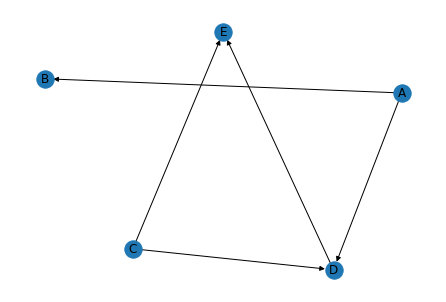

In [39]:
from pgmpy.models import BayesianModel
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True)